# Modification of dataset structure in order to use FADN codes for sheet "FICHA_M

In [1]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt

In [5]:
# Path and file name
path = r"C:\Users\IDENER-Matlab1\Desktop\AGRICORE\SharePoint\OneDrive_2021-02-16\Microdatos para OTE370"
file_name = "book.xlsx"

# Reading microdata sheet "Ficha_M"
table_M = pd.read_excel(os.path.join(path, file_name), sheet_name="Ficha_M")

In [6]:
table_M.head(10)

Ejercicio  Explotacion  Categoría  Financiación  Cod. Unidad  Cod. Admin.  \
0       2014        55284       1110             1            2          NaN   
1       2014        55284       4200             3            4          NaN   
2       2014        55284       2900             3            4          NaN   
3       2014        55284       2331             3            2          NaN   
4       2015        55284       4200             3            4          0.0   
5       2015        55284      10220             0            0          4.0   
6       2015        55284      10000             0            0          1.0   
7       2015        55284      10100             0            0          4.0   
8       2015        55284      10200             0            0          4.0   
9       2015        55284      10210             0            0          4.0   

   Unidad Base  Euros  
0         14.0   6663  
1          0.0    153  
2          0.0     67  
3          5.0    395  
4          0.0    158  
5          0.0      0  
6          0.0      0  
7          0.0      0  
8          0.0      0  
9          0.0      0

Converssion with *Farmer_model.pdf/Table 19: L. OTHER GAINFUL ACTIVITIES*  

In [7]:
len(table_M.columns)

8

In [8]:
def _sortingDF(DF, columns):
    """
    Ordering dataframe by columns values
    """
    
    sortedDF = pd.DataFrame(columns=DF.columns)
    
    # Building dictionary to store n unique values for each column
    dict_ = {}
    
    for col in columns:
        dict_[col] = sorted(DF[col].unique())
    
    # Building lists containing nunique values for each list
    # Loop exploitations
    for expl in dict_["Explotacion"]:
        
        # Loop years
        for y in dict_["Ejercicio"]:
            
            # Loop Categories
            for cat in dict_["Categoría"]:
                
                dataset = DF[(DF["Explotacion"]==expl) & (DF["Ejercicio"]==y) & (DF["Categoría"]==cat)]
                    
                if not dataset.empty:
                    sortedDF = pd.concat([sortedDF, dataset])
    
    # Index modification
    sortedDF.index = np.arange(sortedDF.shape[0])
    
    return sortedDF

In [9]:
table_M_sorted = _sortingDF(table_M, ["Ejercicio", "Explotacion", "Categoría"])

In [10]:
table_M_sorted

Ejercicio Explotacion Categoría Financiación Cod. Unidad  Cod. Admin.  \
0         2014       55284      1110            1           2          NaN   
1         2014       55284      2331            3           2          NaN   
2         2014       55284      2900            3           4          NaN   
3         2014       55284      4200            3           4          NaN   
4         2015       55284      1150            1           2          0.0   
...        ...         ...       ...          ...         ...          ...   
9853      2018       92888      1400            1           2          NaN   
9854      2018       92889      1150            1           2          NaN   
9855      2018       92889      1400            1           2          NaN   
9856      2018       92890      1150            1           2          NaN   
9857      2018       92890      1400            1           2          NaN   

      Unidad Base Euros  
0           14.00  6663  
1            5.00   395  
2            0.00    67  
3            0.00   153  
4           19.93  4136  
...           ...   ...  
9853         0.00   658  
9854        17.00  5867  
9855         0.00  3092  
9856        17.00  1681  
9857         0.00   888  

[9858 rows x 8 columns]

In [11]:
table_M_sorted.to_csv("table_M_sorted.csv", index=False)

In [12]:
table_M_sorted.shape

(9858, 8)

In [13]:
# Unique exploitations contained in the dataset
len(table_M_sorted.Explotacion.unique())

460

In [14]:
# Unique codes contained in the dataset 
sorted(table_M_sorted.Categoria.unique())

AttributeError: 'DataFrame' object has no attribute 'Categoria'

In [16]:
# FADN table codes
codes = [
    1150,
    1200,
    1300,
    1400,
    1500,
    1600,
    1700,
    
    23111,
    23112,
    23113,
    2312,
    23121,
    2313,
    
    23141,
    23142,
    23143,
    23145,
    23149,
    2315,
    2316,
    2317,
    2318,
    2319,
    2320,
    2321,
    2322,
    2323,
    2324,
    23311,
    23312,
    2332,
    2333,
    2334,
    
    2335,
    2339,
    
    2341,
    2342,
    2343,
    2344,
    2345,
    2346,
    2349,
    2410,
    2490,
    
    2810,
    2890,
    2900,
    
    3100,
    3300,
    3350,
    3400,
    3500,
    
    3610,
    3620,
    3750,
    3900,
    
    4100,
    4200,
    
    4310,
    4320,
    4330,
    
    4410,
    4420,
    4430,
    4440,
    
    4510,
    4520,
    4530,
    4540,
    4550,
    4600,
    4900,
    
    5100,
    5200,
    5300,
    5400,
    5900,
    9000,
    
    10000,
    10100,
    10200,
    10210,
    10220,
    10300,
    10310,
    10311,
    10312,
    10313,
    10314,
    10315,
    10316,
    10317,
    10318,
    10319]

In [17]:
for i in [1150,1200,1300,1400,1500,1600,1700,23111,23112,23113,2312,23121,2313,23141,23142,23143,23145,23149,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,23311,23312,2332,2333,2334,2335,2339,2341,2342,2343,2344,2345,2346,2349,2410,2490,2810,2890,2900,3100,3300,3350,3400,3500,3610,3620,3750,3900,4100,4200,4310,4320,4330,4410,4420,4430,4440,4510,4520,4530,4540,4550,4600,4900,5100,5200,5300,5400,5900,9000]:
    print('[{}, "S"], '.format(i))    

[1150, "S"], 
[1200, "S"], 
[1300, "S"], 
[1400, "S"], 
[1500, "S"], 
[1600, "S"], 
[1700, "S"], 
[23111, "S"], 
[23112, "S"], 
[23113, "S"], 
[2312, "S"], 
[23121, "S"], 
[2313, "S"], 
[23141, "S"], 
[23142, "S"], 
[23143, "S"], 
[23145, "S"], 
[23149, "S"], 
[2315, "S"], 
[2316, "S"], 
[2317, "S"], 
[2318, "S"], 
[2319, "S"], 
[2320, "S"], 
[2321, "S"], 
[2322, "S"], 
[2323, "S"], 
[2324, "S"], 
[23311, "S"], 
[23312, "S"], 
[2332, "S"], 
[2333, "S"], 
[2334, "S"], 
[2335, "S"], 
[2339, "S"], 
[2341, "S"], 
[2342, "S"], 
[2343, "S"], 
[2344, "S"], 
[2345, "S"], 
[2346, "S"], 
[2349, "S"], 
[2410, "S"], 
[2490, "S"], 
[2810, "S"], 
[2890, "S"], 
[2900, "S"], 
[3100, "S"], 
[3300, "S"], 
[3350, "S"], 
[3400, "S"], 
[3500, "S"], 
[3610, "S"], 
[3620, "S"], 
[3750, "S"], 
[3900, "S"], 
[4100, "S"], 
[4200, "S"], 
[4310, "S"], 
[4320, "S"], 
[4330, "S"], 
[4410, "S"], 
[4420, "S"], 
[4430, "S"], 
[4440, "S"], 
[4510, "S"], 
[4520, "S"], 
[4530, "S"], 
[4540, "S"], 
[4550, "S"], 
[4600, "S

In [18]:
for i in [10000,10100,10200,10210,10220,10300,10310,10311,10312,10313,10314,10315,10316,10317,10318,10319]:
    print('[{}, "AI"], '.format(i))

[10000, "AI"], 
[10100, "AI"], 
[10200, "AI"], 
[10210, "AI"], 
[10220, "AI"], 
[10300, "AI"], 
[10310, "AI"], 
[10311, "AI"], 
[10312, "AI"], 
[10313, "AI"], 
[10314, "AI"], 
[10315, "AI"], 
[10316, "AI"], 
[10317, "AI"], 
[10318, "AI"], 
[10319, "AI"], 


In [19]:
codes_groups = [[1150, "S"], [1200, "S"], [1300, "S"], [1400, "S"], [1500, "S"], [1600, "S"], [1700, "S"], [23111, "S"], [23112, "S"], [23113, "S"], [2312, "S"], [23121, "S"], [2313, "S"], [23141, "S"], [23142, "S"], [23143, "S"], [23145, "S"], [23149, "S"], [2315, "S"], [2316, "S"], [2317, "S"], [2318, "S"], [2319, "S"], [2320, "S"], [2321, "S"], [2322, "S"], [2323, "S"], [2324, "S"], [23311, "S"], [23312, "S"], [2332, "S"], [2333, "S"], [2334, "S"], [2335, "S"], [2339, "S"], [2341, "S"], [2342, "S"], [2343, "S"], [2344, "S"], [2345, "S"], [2346, "S"], [2349, "S"], [2410, "S"], [2490, "S"], [2810, "S"], [2890, "S"], [2900, "S"], [3100, "S"], [3300, "S"], [3350, "S"], [3400, "S"], [3500, "S"], [3610, "S"], [3620, "S"], [3750, "S"], [3900, "S"], [4100, "S"], [4200, "S"], [4310, "S"], [4320, "S"], [4330, "S"], [4410, "S"], [4420, "S"], [4430, "S"], [4440, "S"], [4510, "S"], [4520, "S"], [4530, "S"], [4540, "S"], [4550, "S"], [4600, "S"], [4900, "S"], [5100, "S"], [5200, "S"], [5300, "S"], [5400, "S"], [5900, "S"], [9000, "S"], [10000, "AI"], [10100, "AI"], [10200, "AI"], [10210, "AI"], [10220, "AI"], [10300, "AI"], [10310, "AI"], [10311, "AI"], [10312, "AI"], [10313, "AI"], [10314, "AI"], [10315, "AI"], [10316, "AI"], [10317, "AI"], [10318, "AI"], [10319, "AI"]]

In [20]:
for col in table_M_sorted.columns:
    print(col)

Ejercicio
Explotacion
Categoría
Financiación
Cod. Unidad
Cod. Admin.
Unidad Base
Euros


In pdf table M, the only code/groups pair that have associated a new column name for the column table **T** are:  

* 10000
* 10100
* 10200
* 10210
* 10220
* 10300

10000
10100
10200
10210
10220
10300


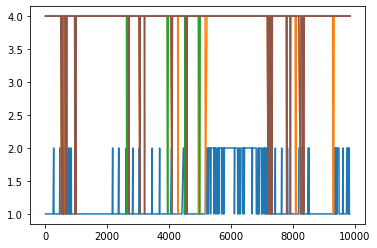

In [21]:
list2explore = [10000, 10100, 10200, 10210, 10220, 10300]

for expl_ in list2explore:
    print(expl_)
    plt.plot(table_M_sorted[table_M_sorted["Categoría"] == expl_]["Cod. Admin."])
    
plt.show()

In [22]:
# Checking which categories have different values from 0 or nan in the column "Cod. Admin."
expl_with_cod_admin = []

for i in table_M_sorted.index:
    #for i in range(30):
    if table_M_sorted.loc[i].T["Cod. Admin."] > 0:
        expl_with_cod_admin.append(table_M_sorted.loc[i].T["Categoría"])
        print(table_M_sorted.loc[i].T["Categoría"], table_M_sorted.loc[i].T["Cod. Admin."])

10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0


10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0


10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 2.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0


10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0


10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 1.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 1.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 1.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0
10300 4.0
10000 1.0
10100 4.0
10200 4.0
10210 4.0
10220 4.0


In [25]:
expl_with_cod_admin_df = pd.DataFrame(expl_with_cod_admin, columns=["Cod. Admin."])

expl_with_cod_admin_df["Cod. Admin."].unique()

array([10000, 10100, 10200, 10210, 10220, 10300], dtype=int64)

In [26]:
table_M_sorted.columns

Index(['Ejercicio', 'Explotacion', 'Categoría', 'Financiación', 'Cod. Unidad',
       'Cod. Admin.', 'Unidad Base', 'Euros'],
      dtype='object')

10000, 10100, 10200, 10210, 10220, 10300 codes are those for which the pdf table has specified cells for the column "T".  
In the dataset, only those rows whose column "Cod. Admin." has a value contained in the previous list, have a value different from 0 or nan. So the correspondence between old and new columns stays as follows:  
  
|Old|New|
| --- | --- |
| Ejercicio | Ejercicio |
| Explotacion | Explotacion |
| Categoria | M_{S/AI}_Categoria_FI_BU_{N/V/T} |
| Cod. Admin. | M_{S/AI}_Categoria_FI_BU_T |
| Unidad Base | M_{S/AI}_Categoria_FI_BU_N |
| Euros | M_{S/AI}_Categoria_FI_BU_V|
| Financiación| |
| Cod. Unidad| |


In [27]:
# Checking which categories have different values from 0 for the column "Financiación"
expl_with_Financiacion = []

for i in table_M_sorted.index:
    
    if table_M_sorted.loc[i].T["Financiación"] > 0:
        expl_with_cod_admin.append(table_M_sorted.loc[i].T["Categoría"])
        #print(table_M_sorted.loc[i].T["Categoría"], table_M_sorted.loc[i].T["Financiación"])
        
expl_with_cod_admin_df = pd.DataFrame(expl_with_cod_admin, columns=["Financiación"])
expl_with_cod_admin_df["Financiación"].unique()

array([10000, 10100, 10200, 10210, 10220, 10300,  1110,  2331,  2900,
        4200,  1150,  1400, 23312,  3500,  3300,  3200,  3350,  3900,
        1600, 23113,  3610,  9000,  2334,  3100,  1700,  2322,  2323,
        2150,  2250,  4410,  2344,  2318, 23112,  2343,  2342],
      dtype=int64)

In [28]:
table_M_sorted.columns

Index(['Ejercicio', 'Explotacion', 'Categoría', 'Financiación', 'Cod. Unidad',
       'Cod. Admin.', 'Unidad Base', 'Euros'],
      dtype='object')

In [29]:
# Checking if any has Euros value positive and Financiación equals to zero
table_M_sorted[(table_M_sorted["Euros"] > 0) & (table_M_sorted["Financiación"] == 0)]

Empty DataFrame
Columns: [Ejercicio, Explotacion, Categoría, Financiación, Cod. Unidad, Cod. Admin., Unidad Base, Euros]
Index: []

In [30]:
# Checking if any has Euros value positive and Cod. Unidad equals to zero
table_M_sorted[(table_M_sorted["Euros"] > 0) & (table_M_sorted["Cod. Unidad"] == 0)]

Empty DataFrame
Columns: [Ejercicio, Explotacion, Categoría, Financiación, Cod. Unidad, Cod. Admin., Unidad Base, Euros]
Index: []

If an exploitation for a certain year has assigned a positive value in "Euros" column, the corresponding "Financiación" will be greater than zero.


In [31]:
# Checking which categories have different values from 0 for the column "Cod.Unidad"
expl_with_Financiacion = []

for i in table_M_sorted.index:
    
    if table_M_sorted.loc[i].T["Cod. Unidad"] == 0:
        expl_with_cod_admin.append(table_M_sorted.loc[i].T["Categoría"])
        #print(table_M_sorted.loc[i].T["Categoría"], table_M_sorted.loc[i].T["Financiación"])
        
expl_with_cod_admin_df = pd.DataFrame(expl_with_cod_admin, columns=["Cod. Unidad"])
expl_with_cod_admin_df["Cod. Unidad"].unique()

array([10000, 10100, 10200, 10210, 10220, 10300,  1110,  2331,  2900,
        4200,  1150,  1400, 23312,  3500,  3300,  3200,  3350,  3900,
        1600, 23113,  3610,  9000,  2334,  3100,  1700,  2322,  2323,
        2150,  2250,  4410,  2344,  2318, 23112,  2343,  2342],
      dtype=int64)

In [32]:
#
table_M_sorted[(table_M_sorted["Financiación"] == 1) & (table_M_sorted["Cod. Unidad"] == 2)]["Categoría"].unique()

array([1110, 1150, 1400, 1600, 23113, 2334, 2322, 2323, 2150, 23312, 2318,
       23112], dtype=object)

In [33]:
#
table_M_sorted[(table_M_sorted["Financiación"] == 3) & (table_M_sorted["Cod. Unidad"] == 2)]["Categoría"].unique()

array([2331, 2322, 2250, 23312, 23112], dtype=object)

In [34]:
#
table_M_sorted[(table_M_sorted["Financiación"] == 3) & (table_M_sorted["Cod. Unidad"] == 4)]["Categoría"].unique()

array([2900, 4200, 4410], dtype=object)

In [35]:
#
table_M_sorted[(table_M_sorted["Financiación"] == 2) & (table_M_sorted["Cod. Unidad"] == 2)]["Categoría"].unique()

array([23312, 3500, 3300, 3350], dtype=object)

In [36]:
# Different combinations between "Financiación" and "Cod. Unidad"

_list = []

for i in table_M_sorted.index:
    
    fin = table_M_sorted[["Financiación", "Cod. Unidad"]].loc[i]["Financiación"]  
    cod = table_M_sorted[["Financiación", "Cod. Unidad"]].loc[i]["Cod. Unidad"]    
    
    _list.append(100*fin + cod)
    #print(table_M_sorted[["Financiación", "Cod. Unidad"]].loc[i])

In [37]:
fin_cod_df = pd.DataFrame(_list, columns=["Fin_Cod"])

In [38]:
fin_cod_df["Fin_Cod"].unique()

array([102, 302, 304,   0, 202, 204, 201, 104, 101], dtype=int64)

Available combinations for parameters "Financiación" and "Cod. Unidad"  

| n | Financiación | Cod. Unidad |
| - | ------------ | ----------- |
| 1 |      1       |      2      |
| 2 |      3       |      2      |
| 3 |      3       |      4      |
| 4 |      0       |      0      |
| 5 |      2       |      2      |
| 6 |      2       |      4      |
| 7 |      2       |      1      |
| 8 |      1       |      4      |
| 9 |      1       |      1      |


In [39]:
table_M_sorted["Cod. Admin."].unique()

array([nan,  0.,  1.,  4.,  2.])

In [59]:
# Cells of the pdf table
new_cols_names = [
    "M_S_1150_FI_BU_N", "M_S_1150_FI_BU_V", 
    "M_S_1200_FI_BU_N", "M_S_1200_FI_BU_V", 
    "M_S_1300_FI_BU_N", "M_S_1300_FI_BU_V", 
                        "M_S_1400_FI_BU_V", 
    "M_S_1500_FI_BU_N", "M_S_1500_FI_BU_V", 
    "M_S_1600_FI_BU_N", "M_S_1600_FI_BU_V", 
    "M_S_1700_FI_BU_N", "M_S_1700_FI_BU_V", 
    
    "M_S_23111_FI_BU_N", "M_S_23111_FI_BU_V", 
    "M_S_23112_FI_BU_N", "M_S_23112_FI_BU_V", 
    "M_S_23113_FI_BU_N", "M_S_23113_FI_BU_V", 
    "M_S_2312_FI_BU_N", "M_S_2312_FI_BU_V", 
    "M_S_23121_FI_BU_N", "M_S_23121_FI_BU_V", 
    "M_S_2313_FI_BU_N", "M_S_2313_FI_BU_V", 
    
    "M_S_23141_FI_BU_N", "M_S_23141_FI_BU_V", 
    "M_S_23142_FI_BU_N", "M_S_23142_FI_BU_V", 
    "M_S_23143_FI_BU_N", "M_S_23143_FI_BU_V", 
    "M_S_23144_FI_BU_N", "M_S_23144_FI_BU_V", 
    "M_S_23145_FI_BU_N", "M_S_23145_FI_BU_V", 
    "M_S_23149_FI_BU_N", "M_S_23149_FI_BU_V", 
    "M_S_2315_FI_BU_N", "M_S_2315_FI_BU_V", 
    "M_S_2316_FI_BU_N", "M_S_2316_FI_BU_V", 
    "M_S_2317_FI_BU_N", "M_S_2317_FI_BU_V", 
    "M_S_2318_FI_BU_N", "M_S_2318_FI_BU_V", 
    "M_S_2319_FI_BU_N", "M_S_2319_FI_BU_V", 
    "M_S_2320_FI_BU_N", "M_S_2320_FI_BU_V", 
    "M_S_2321_FI_BU_N", "M_S_2321_FI_BU_V", 
    "M_S_2322_FI_BU_N", "M_S_2322_FI_BU_V", 
    "M_S_2323_FI_BU_N", "M_S_2323_FI_BU_V", 
    "M_S_2324_FI_BU_N", "M_S_2324_FI_BU_V", 
    
    "M_S_23311_FI_BU_N", "M_S_23311_FI_BU_V", 
    "M_S_23312_FI_BU_N", "M_S_23312_FI_BU_V", 
    "M_S_2332_FI_BU_N", "M_S_2332_FI_BU_V", 
    "M_S_2333_FI_BU_N", "M_S_2333_FI_BU_V", 
    "M_S_2334_FI_BU_N", "M_S_2334_FI_BU_V", 
    
    "M_S_2335_FI_BU_N", "M_S_2335_FI_BU_V", 
    "M_S_2339_FI_BU_N", "M_S_2339_FI_BU_V", 
    
    "M_S_2341_FI_BU_N", "M_S_2341_FI_BU_V", 
    "M_S_2342_FI_BU_N", "M_S_2342_FI_BU_V", 
    "M_S_2343_FI_BU_N", "M_S_2343_FI_BU_V", 
    "M_S_2344_FI_BU_N", "M_S_2344_FI_BU_V", 
    "M_S_2345_FI_BU_N", "M_S_2345_FI_BU_V", 
    "M_S_2346_FI_BU_N", "M_S_2346_FI_BU_V", 
    "M_S_2349_FI_BU_N", "M_S_2349_FI_BU_V", 
    "M_S_2410_FI_BU_N", "M_S_2410_FI_BU_V", 
    "M_S_2490_FI_BU_N", "M_S_2490_FI_BU_V", 
    
    "M_S_2810_FI_BU_N", "M_S_2810_FI_BU_V", 
    "M_S_2890_FI_BU_N", "M_S_2890_FI_BU_V", 
    "M_S_2900_FI_BU_N", "M_S_2900_FI_BU_V", 
    
    "M_S_3100_FI_BU_N", "M_S_3100_FI_BU_V", 
    "M_S_3300_FI_BU_N", "M_S_3300_FI_BU_V", 
    "M_S_3350_FI_BU_N", "M_S_3350_FI_BU_V", 
    "M_S_3400_FI_BU_N", "M_S_3400_FI_BU_V", 
    "M_S_3500_FI_BU_N", "M_S_3500_FI_BU_V", 
    
    "M_S_3610_FI_BU_N", "M_S_3610_FI_BU_V", 
    "M_S_3620_FI_BU_N", "M_S_3620_FI_BU_V", 
    "M_S_3750_FI_BU_N", "M_S_3750_FI_BU_V", 
    "M_S_3900_FI_BU_N", "M_S_3900_FI_BU_V", 
    
    "M_S_4100_FI_BU_N", "M_S_4100_FI_BU_V", 
    "M_S_4200_FI_BU_N", "M_S_4200_FI_BU_V", 
    
    "M_S_4310_FI_BU_N", "M_S_4310_FI_BU_V", 
    "M_S_4320_FI_BU_N", "M_S_4320_FI_BU_V", 
    "M_S_4330_FI_BU_N", "M_S_4330_FI_BU_V", 
    
    "M_S_4410_FI_BU_N", "M_S_4410_FI_BU_V", 
    "M_S_4420_FI_BU_N", "M_S_4420_FI_BU_V", 
    "M_S_4430_FI_BU_N", "M_S_4430_FI_BU_V", 
    "M_S_4440_FI_BU_N", "M_S_4440_FI_BU_V", 
    
    "M_S_4510_FI_BU_N", "M_S_4510_FI_BU_V", 
    "M_S_4520_FI_BU_N", "M_S_4520_FI_BU_V", 
    "M_S_4530_FI_BU_N", "M_S_4530_FI_BU_V", 
    "M_S_4540_FI_BU_N", "M_S_4540_FI_BU_V", 
    "M_S_4550_FI_BU_N", "M_S_4550_FI_BU_V", 
    "M_S_4600_FI_BU_N", "M_S_4600_FI_BU_V", 
    "M_S_4900_FI_BU_N", "M_S_4900_FI_BU_V", 
    
    "M_S_5100_FI_BU_N", "M_S_5100_FI_BU_V", 
    "M_S_5200_FI_BU_N", "M_S_5200_FI_BU_V", 
    "M_S_5300_FI_BU_N", "M_S_5300_FI_BU_V", 
    "M_S_5400_FI_BU_N", "M_S_5400_FI_BU_V", 
    "M_S_5900_FI_BU_N", "M_S_5900_FI_BU_V", 
    "M_S_9000_FI_BU_N", "M_S_9000_FI_BU_V", 
    
                                            "M_AI_10000_FI_BU_T", 
    "M_AI_10100_FI_BU_N",                   "M_AI_10100_FI_BU_T", 
    "M_AI_10200_FI_BU_N",                   "M_AI_10200_FI_BU_T", 
    "M_AI_10210_FI_BU_N",                   "M_AI_10210_FI_BU_T", 
    "M_AI_10220_FI_BU_N",                   "M_AI_10220_FI_BU_T", 
    "M_AI_10300_FI_BU_N",                   "M_AI_10300_FI_BU_T", 
    
    "M_AI_10310_FI_BU_N", 
    "M_AI_10311_FI_BU_N", 
    "M_AI_10312_FI_BU_N", 
    "M_AI_10313_FI_BU_N", 
    "M_AI_10314_FI_BU_N", 
    "M_AI_10315_FI_BU_N", 
    "M_AI_10316_FI_BU_N", 
    "M_AI_10317_FI_BU_N", 
    "M_AI_10318_FI_BU_N", 
    "M_AI_10319_FI_BU_N", 
    ]

In [60]:
len(new_cols_names)

178

In [61]:
link = {
    "Unidad Base": "N",
    "Euros": "V",
    "Cod. Admin": "T"
}


In [62]:
new_DF = pd.DataFrame(columns=["Ejercicio", "Explotacion"] + new_cols_names)

In [63]:
new_DF

Empty DataFrame
Columns: [Ejercicio, Explotacion, M_S_1150_FI_BU_N, M_S_1150_FI_BU_V, M_S_1200_FI_BU_N, M_S_1200_FI_BU_V, M_S_1300_FI_BU_N, M_S_1300_FI_BU_V, M_S_1400_FI_BU_V, M_S_1500_FI_BU_N, M_S_1500_FI_BU_V, M_S_1600_FI_BU_N, M_S_1600_FI_BU_V, M_S_1700_FI_BU_N, M_S_1700_FI_BU_V, M_S_23111_FI_BU_N, M_S_23111_FI_BU_V, M_S_23112_FI_BU_N, M_S_23112_FI_BU_V, M_S_23113_FI_BU_N, M_S_23113_FI_BU_V, M_S_2312_FI_BU_N, M_S_2312_FI_BU_V, M_S_23121_FI_BU_N, M_S_23121_FI_BU_V, M_S_2313_FI_BU_N, M_S_2313_FI_BU_V, M_S_23141_FI_BU_N, M_S_23141_FI_BU_V, M_S_23142_FI_BU_N, M_S_23142_FI_BU_V, M_S_23143_FI_BU_N, M_S_23143_FI_BU_V, M_S_23144_FI_BU_N, M_S_23144_FI_BU_V, M_S_23145_FI_BU_N, M_S_23145_FI_BU_V, M_S_23149_FI_BU_N, M_S_23149_FI_BU_V, M_S_2315_FI_BU_N, M_S_2315_FI_BU_V, M_S_2316_FI_BU_N, M_S_2316_FI_BU_V, M_S_2317_FI_BU_N, M_S_2317_FI_BU_V, M_S_2318_FI_BU_N, M_S_2318_FI_BU_V, M_S_2319_FI_BU_N, M_S_2319_FI_BU_V, M_S_2320_FI_BU_N, M_S_2320_FI_BU_V, M_S_2321_FI_BU_N, M_S_2321_FI_BU_V, M_S_2322_FI_BU_N, M_S_2322_FI_BU_V, M_S_2323_FI_BU_N, M_S_2323_FI_BU_V, M_S_2324_FI_BU_N, M_S_2324_FI_BU_V, M_S_23311_FI_BU_N, M_S_23311_FI_BU_V, M_S_23312_FI_BU_N, M_S_23312_FI_BU_V, M_S_2332_FI_BU_N, M_S_2332_FI_BU_V, M_S_2333_FI_BU_N, M_S_2333_FI_BU_V, M_S_2334_FI_BU_N, M_S_2334_FI_BU_V, M_S_2335_FI_BU_N, M_S_2335_FI_BU_V, M_S_2339_FI_BU_N, M_S_2339_FI_BU_V, M_S_2341_FI_BU_N, M_S_2341_FI_BU_V, M_S_2342_FI_BU_N, M_S_2342_FI_BU_V, M_S_2343_FI_BU_N, M_S_2343_FI_BU_V, M_S_2344_FI_BU_N, M_S_2344_FI_BU_V, M_S_2345_FI_BU_N, M_S_2345_FI_BU_V, M_S_2346_FI_BU_N, M_S_2346_FI_BU_V, M_S_2349_FI_BU_N, M_S_2349_FI_BU_V, M_S_2410_FI_BU_N, M_S_2410_FI_BU_V, M_S_2490_FI_BU_N, M_S_2490_FI_BU_V, M_S_2810_FI_BU_N, M_S_2810_FI_BU_V, M_S_2890_FI_BU_N, M_S_2890_FI_BU_V, M_S_2900_FI_BU_N, M_S_2900_FI_BU_V, M_S_3100_FI_BU_N, M_S_3100_FI_BU_V, M_S_3300_FI_BU_N, ...]
Index: []

[0 rows x 180 columns]

## FADN tables relationships
Each one of these columns only contains zero in their cells. It also can not be linked to any of the pdf tables columns.

In [64]:
table_M_sorted.columns

Index(['Ejercicio', 'Explotacion', 'Categoría', 'Financiación', 'Cod. Unidad',
       'Cod. Admin.', 'Unidad Base', 'Euros'],
      dtype='object')

In [65]:
# Objetivo: cada fila corresponde a una explotacion y año

def _newColumnName(oc_name, code):
    """
    Compossing new column name from old column name and code.
    """
    
    # Group assignation according with the code
    if code in [10000,10100,10200,10210,10220,10300,10310,10311,10312,10313,10314,10315,10316,10317,10318,10319]:
        group = "AI"
    else:
        group = "S"
    
    # Link between old columns and new column names
    link = {
    "Unidad Base": "N",
    "Euros": "V",
    "Cod. Admin.": "T"
    }
    
    return "M_{}_{}_FI_BU_{}".format(group, code, link[oc_name])
    

def _DFconverssion(DF, new_column_names):
    """
    Dataframe converssion with new characterisartion
    DF: original dataframe
    new_col_names: new columns names
    """
    
    # Building new dataframe
    newDF = pd.DataFrame(columns=["Explotacion", "Ejercicio"]+new_column_names)
    
    # Sorted unique values extraction
    exploitations = sorted(DF.Explotacion.unique())
    
    index = 0
    
    # Loop all exploitations
    for expl in exploitations:
        
        # Subset for the current exploitation
        sub_expl = DF[DF["Explotacion"] == expl]
        
        # Getting all years for the current exploitation
        years = sorted(sub_expl.Ejercicio.unique())
    
        # Loop all years
        for y in years:
            
            # Extract subsets corresponding to expl and y
            sub_expl_y = sub_expl[sub_expl["Ejercicio"] == y]
            
            # Number of cotegories
            categories = sorted(sub_expl_y["Categoría"].unique())
            
            # Building new row
            new_row = pd.DataFrame(columns=["Explotacion", "Ejercicio"]+new_column_names, index=[index])

            # Assignation of new row identificators
            new_row.at[index, "Ejercicio"] = y
            new_row.at[index, "Explotacion"] = expl

            # Loop categories
            for cat in categories:
                
                # Getting the row for Exploitation/Year/Category
                row = sub_expl_y[sub_expl_y["Categoría"] == cat]
                
                # Crop code
                code = row["Categoría"].item()
                
                # Loop row columns
                for oc in row.columns:
                    
                    # Item selection
                    item = row[oc].item()
                    
                    # Other column nt identificative
                    if not oc in ['Ejercicio', 'Explotacion', 'Categoría', 'Financiación', 'Cod. Unidad']:

                        # Compossing new name
                        newName = _newColumnName(oc, code)
                        
                        if newName in new_column_names:

                            # Item asignation
                            new_row.at[index, newName] = item

            # DF concatenation
            newDF = pd.concat([newDF, new_row])
            
            # Increasing row index
            index += 1
            
    return newDF        

In [66]:
table_M = _DFconverssion(table_M_sorted, new_cols_names)

In [67]:
table_M

Explotacion Ejercicio M_S_1150_FI_BU_N M_S_1150_FI_BU_V M_S_1200_FI_BU_N  \
0          55284      2014              NaN              NaN              NaN   
1          55284      2015            19.93             4136              NaN   
2          55290      2014              NaN              NaN              NaN   
3          55290      2015            20.01             8012              NaN   
4          55290      2016            20.11             7633              NaN   
...          ...       ...              ...              ...              ...   
1700       92886      2018             17.5             4006              NaN   
1701       92887      2018             17.5             3073              NaN   
1702       92888      2018               13             1244              NaN   
1703       92889      2018               17             5867              NaN   
1704       92890      2018               17             1681              NaN   

     M_S_1200_FI_BU_V M_S_1300_FI_BU_N M_S_1300_FI_BU_V M_S_1400_FI_BU_V  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN             2137   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN             4142   
4                 NaN              NaN              NaN             3904   
...               ...              ...              ...              ...   
1700              NaN              NaN              NaN             2106   
1701              NaN              NaN              NaN             1613   
1702              NaN              NaN              NaN              658   
1703              NaN              NaN              NaN             3092   
1704              NaN              NaN              NaN              888   

     M_S_1500_FI_BU_N  ... M_AI_10310_FI_BU_N M_AI_10311_FI_BU_N  \
0                 NaN  ...                NaN                NaN   
1                 NaN  ...                NaN                NaN   
2                 NaN  ...                NaN                NaN   
3                 NaN  ...                NaN                NaN   
4                 NaN  ...                NaN                NaN   
...               ...  ...                ...                ...   
1700              NaN  ...                NaN                NaN   
1701              NaN  ...                NaN                NaN   
1702              NaN  ...                NaN                NaN   
1703              NaN  ...                NaN                NaN   
1704              NaN  ...                NaN                NaN   

     M_AI_10312_FI_BU_N M_AI_10313_FI_BU_N M_AI_10314_FI_BU_N  \
0                   NaN                NaN                NaN   
1                   NaN                NaN                NaN   
2                   NaN                NaN                NaN   
3                   NaN                NaN                NaN   
4                   NaN                NaN                NaN   
...                 ...                ...                ...   
1700                NaN                NaN                NaN   
1701                NaN                NaN                NaN   
1702                NaN                NaN                NaN   
1703                NaN                NaN                NaN   
1704                NaN                NaN                NaN   

     M_AI_10315_FI_BU_N M_AI_10316_FI_BU_N M_AI_10317_FI_BU_N  \
0                   NaN                NaN                NaN   
1                   NaN                NaN                NaN   
2                   NaN                NaN                NaN   
3                   NaN                NaN                NaN   
4                   NaN                NaN                NaN   
...                 ...                ...                ...   
1700                NaN                NaN                NaN   
1

In [77]:
table_M.to_csv("table_M.csv", index=False)

# Checking

In [68]:
rnd_expl = random.sample(list(table_M["Explotacion"]), 1)[0]

expl_ = table_M[table_M["Explotacion"] == rnd_expl]
expl_

Explotacion Ejercicio M_S_1150_FI_BU_N M_S_1150_FI_BU_V M_S_1200_FI_BU_N  \
1533       90892      2015               36            20486              NaN   
1534       90892      2016               36            18323              NaN   
1535       90892      2017               36            17580              NaN   
1536       90892      2018               36            16921              NaN   

     M_S_1200_FI_BU_V M_S_1300_FI_BU_N M_S_1300_FI_BU_V M_S_1400_FI_BU_V  \
1533              NaN              NaN              NaN            10592   
1534              NaN              NaN              NaN             9459   
1535              NaN              NaN              NaN             9271   
1536              NaN              NaN              NaN             8945   

     M_S_1500_FI_BU_N  ... M_AI_10310_FI_BU_N M_AI_10311_FI_BU_N  \
1533              NaN  ...                NaN                NaN   
1534              NaN  ...                NaN                NaN   
1535              NaN  ...                NaN                NaN   
1536              NaN  ...                NaN                NaN   

     M_AI_10312_FI_BU_N M_AI_10313_FI_BU_N M_AI_10314_FI_BU_N  \
1533                NaN                NaN                NaN   
1534                NaN                NaN                NaN   
1535                NaN                NaN                NaN   
1536                NaN                NaN                NaN   

     M_AI_10315_FI_BU_N M_AI_10316_FI_BU_N M_AI_10317_FI_BU_N  \
1533                NaN                NaN                NaN   
1534                NaN                NaN                NaN   
1535                NaN                NaN                NaN   
1536                NaN                NaN                NaN   

     M_AI_10318_FI_BU_N M_AI_10319_FI_BU_N  
1533                NaN                NaN  
1534                NaN                NaN  
1535                NaN                NaN  
1536                NaN                NaN  

[4 rows x 180 columns]

In [69]:
rnd_year = random.sample(list(expl_["Ejercicio"]), 1)[0]
rnd_year

2017

In [70]:
table_M[(table_M["Explotacion"] == rnd_expl) & (table_M["Ejercicio"] == rnd_year)]

Explotacion Ejercicio M_S_1150_FI_BU_N M_S_1150_FI_BU_V M_S_1200_FI_BU_N  \
1535       90892      2017               36            17580              NaN   

     M_S_1200_FI_BU_V M_S_1300_FI_BU_N M_S_1300_FI_BU_V M_S_1400_FI_BU_V  \
1535              NaN              NaN              NaN             9271   

     M_S_1500_FI_BU_N  ... M_AI_10310_FI_BU_N M_AI_10311_FI_BU_N  \
1535              NaN  ...                NaN                NaN   

     M_AI_10312_FI_BU_N M_AI_10313_FI_BU_N M_AI_10314_FI_BU_N  \
1535                NaN                NaN                NaN   

     M_AI_10315_FI_BU_N M_AI_10316_FI_BU_N M_AI_10317_FI_BU_N  \
1535                NaN                NaN                NaN   

     M_AI_10318_FI_BU_N M_AI_10319_FI_BU_N  
1535                NaN                NaN  

[1 rows x 180 columns]

In [71]:
table_M_sorted[(table_M_sorted["Explotacion"] == rnd_expl) & (table_M_sorted["Ejercicio"] == rnd_year)]

Ejercicio Explotacion Categoría Financiación Cod. Unidad  Cod. Admin.  \
8706      2017       90892      1150            1           2          NaN   
8707      2017       90892      1400            1           2          NaN   
8708      2017       90892      9000            1           4          NaN   
8709      2017       90892     10000            0           0          1.0   
8710      2017       90892     10100            0           0          4.0   
8711      2017       90892     10200            0           0          4.0   
8712      2017       90892     10210            0           0          4.0   
8713      2017       90892     10220            0           0          4.0   
8714      2017       90892     10300            0           0          4.0   

      Unidad Base  Euros  
8706         36.0  17580  
8707          0.0   9271  
8708          1.0    353  
8709          0.0      0  
8710          0.0      0  
8711          0.0      0  
8712          0.0      0  
8713          0.0      0  
8714          0.0      0

In [72]:
codes = ["M_"]

In [73]:
table_M_sorted[table_M_sorted["Categoría"] == 1110]["Ejercicio"].unique()

array([2014], dtype=object)

There is a category **1110** only for the year 2014 that does not appear in the pdf table. The new column corresponding to this category is generated automatically since it was not included when new column names were generated.  
Probably is a deprecated category that was not used since 2014.

In [74]:
# 1. Selecting random exploitation
rnd_expl = random.sample(list(table_M_sorted["Explotacion"]), 1)[0]

# 2. Selecting random year
rnd_year = random.sample(list(table_M_sorted[table_M_sorted["Explotacion"] == rnd_expl]["Ejercicio"]), 1)[0]

# Getting data for Exploitation/Year
sub_ey = table_M_sorted[(table_M_sorted["Explotacion"] == rnd_expl) & (table_M_sorted["Ejercicio"] == rnd_year)]

# Loop all categories
for cat in sub_ey.Categoría.unique():
    
    # Selecting row for 
    row = table_M_sorted[(table_M_sorted["Explotacion"] == rnd_expl) & (table_M_sorted["Ejercicio"] == rnd_year) & (table_M_sorted["Categoría"] == cat)]
    
    for col in row.columns:
        
        if not col in ['Ejercicio', 'Explotacion', 'Categoría', 'Financiación', 'Cod. Unidad']:
            
            new_name = _newColumnName(col, cat)
            
            if new_name in new_cols_names:
                new_item = table_M[(table_M["Ejercicio"] == rnd_year) & (table_M["Explotacion"] == rnd_expl)][new_name].item()
                old_item = row[col].item()

                if new_item != old_item:

                    print("ERROR!!")
                    print(col, new_item, old_item)

In [75]:
table_M_sorted[(table_M_sorted["Explotacion"] == 86837) & (table_M_sorted["Ejercicio"] == 2015)]

Ejercicio Explotacion Categoría Financiación Cod. Unidad  Cod. Admin.  \
3944      2015       86837      1150            1           2          NaN   
3945      2015       86837      1400            1           2          NaN   
3946      2015       86837     10000            0           0          1.0   
3947      2015       86837     10100            0           0          4.0   
3948      2015       86837     10200            0           0          1.0   
3949      2015       86837     10210            0           0          4.0   
3950      2015       86837     10220            0           0          4.0   
3951      2015       86837     10300            0           0          4.0   

      Unidad Base  Euros  
3944         38.0  12897  
3945          0.0   6352  
3946          0.0      0  
3947          0.0      0  
3948          4.0      0  
3949          0.0      0  
3950          0.0      0  
3951          0.0      0